# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


# Loading Dataset

In [21]:
df = pd.read_csv('loan.csv')
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Handling categorical values

In [23]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0})
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban':1, 'Rural':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


# Checking for Null Values

In [24]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling Null Values

In [25]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].str.replace('+','')
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [26]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Checking data info

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 57.7+ KB


Since the data types are diffetent we are converting them into same data type

Converting the data type into 'int'

In [28]:
df['Gender']=df['Gender'].astype('int64')
df['Married']=df['Married'].astype('int64')
df['Dependents']=df['Dependents'].astype('int64')
df['Self_Employed']=df['Self_Employed'].astype('int64')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int64')
df['LoanAmount']=df['LoanAmount'].astype('int64')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int64')
df['Credit_History']=df['Credit_History'].astype('int64')

# Scaling the data

In [29]:
scaler=StandardScaler()
columns_to_scale=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

In [30]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0.072991,-0.554487,-0.302759,0.273231,1,2,1
1,0,1,1,1,0,-0.134412,-0.038731,-0.207648,0.273231,1,0,0
2,0,1,0,1,1,-0.393747,-0.554487,-0.944757,0.273231,1,2,1
3,0,1,0,0,0,-0.462062,0.251980,-0.302759,0.273231,1,2,1
4,0,0,0,1,0,0.097728,-0.554487,-0.053093,0.273231,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,-0.410130,-0.554487,-0.885313,0.273231,1,0,1
610,0,1,3,1,0,-0.212557,-0.554487,-1.253868,-2.522836,1,0,1
611,0,1,1,1,0,0.437174,-0.472404,1.278459,0.273231,1,2,1
612,0,1,2,1,0,0.357064,-0.554487,0.493794,0.273231,1,2,1


# Visual Analysis

# Univariate Analysis

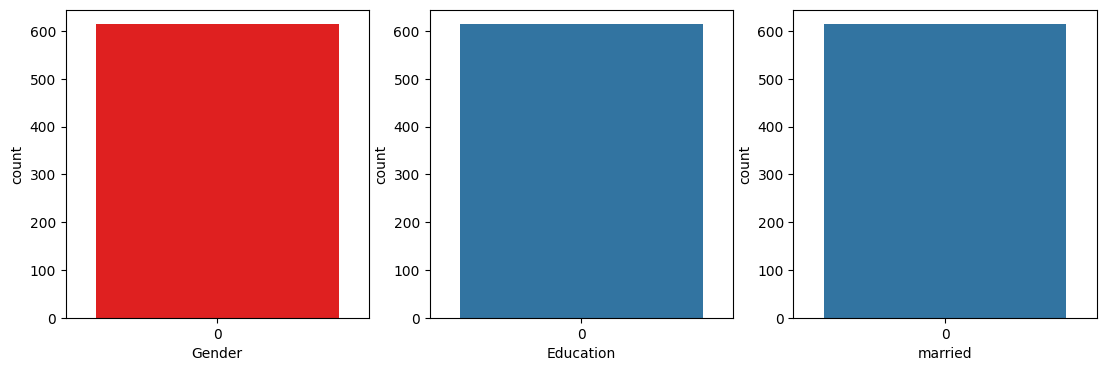

In [31]:
#gender,education and married Visualization using barplot 
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(df ['Gender'],color='r')
plt.xlabel('Gender')
plt.subplot(1,4,2)
sns.countplot(df['Education'])
plt.xlabel('Education')
plt.subplot(1,4,3)
plt.xlabel('married')
sns.countplot(df['Married'])
plt.show()

<Axes: xlabel='Credit_History', ylabel='Count'>

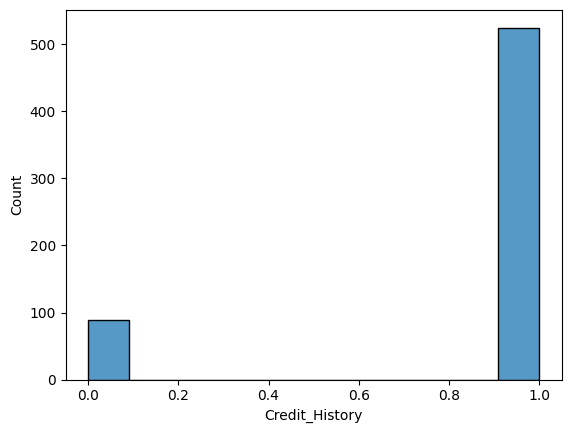

In [32]:
#Histogram
sns.histplot(df['Credit_History'])

Hence,there is a chance of loan approval who have high credit history

# Bivariate Analysis

Using Scatterplot

<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

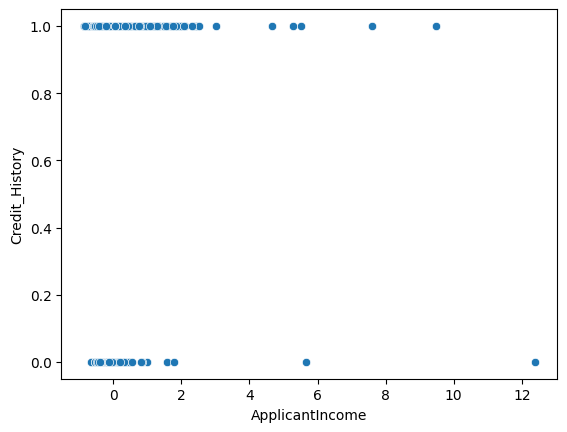

In [33]:

sns.scatterplot(y=df['Credit_History'],x=df['ApplicantIncome'])


Using Bargraphs

<Axes: xlabel='Gender', ylabel='count'>

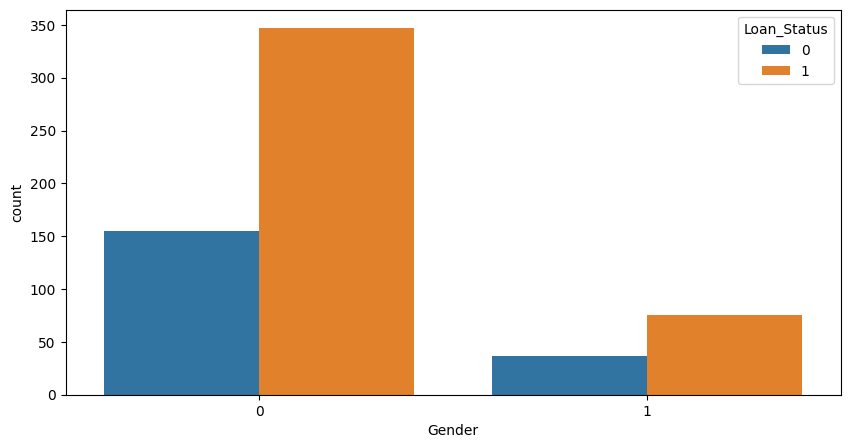

In [34]:
# Between Gender and loan status
plt.figure(figsize=(10,5))
sns.countplot(x = 'Gender', hue = "Loan_Status", data = df)

Hence,the married men have more chances of loan approval

<Axes: xlabel='Self_Employed', ylabel='count'>

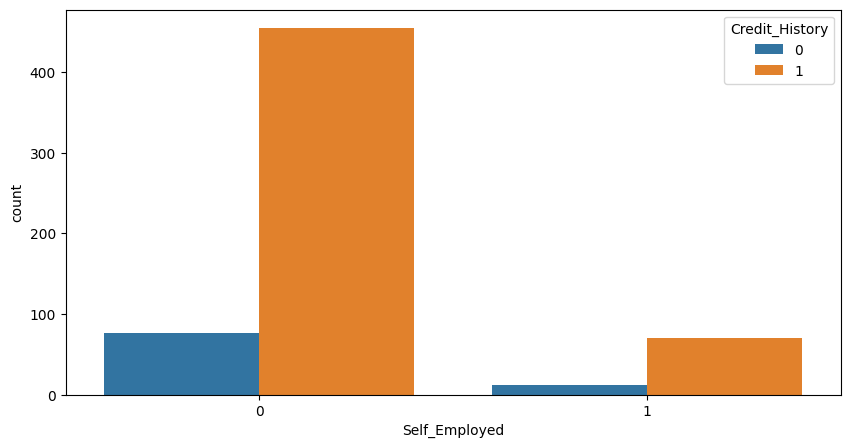

In [35]:
#Between self employed and credit history
plt.figure(figsize=(10,5))
sns.countplot(x = 'Self_Employed', hue = "Credit_History", data = df)

Hence,the self employed have high credit history when compared to employed-in-house

<Axes: xlabel='Property_Area', ylabel='count'>

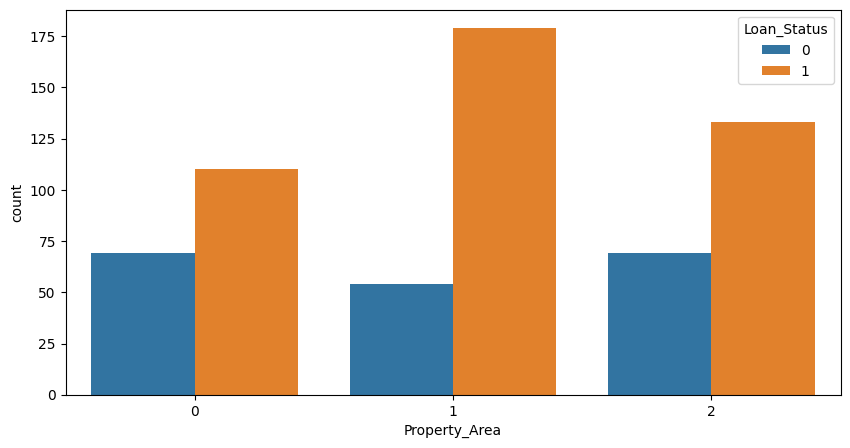

In [36]:
#Between property area and loan status 
plt.figure(figsize=(10,5))
sns.countplot(x = 'Property_Area', hue = "Loan_Status", data = df)

Hence,the chances of loan approval is high for applicants who have property in semi urban areas

# Multivariate Analysis

<Axes: >

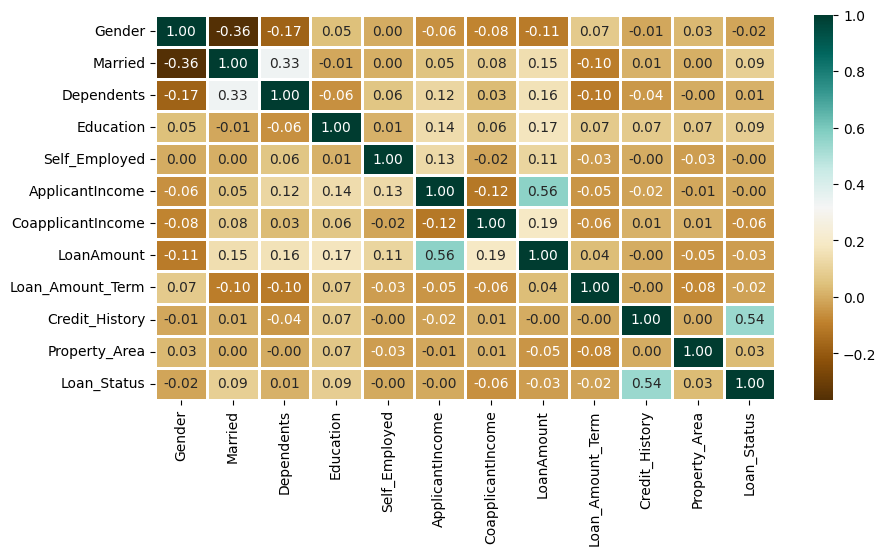

In [38]:
#Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

Correlation matrix of the data

# Splitting the data into training data and testing data

In [39]:
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Building

RandomForest model

In [40]:
from tensorflow.keras import Model
def RandomForest(x_train,x_test,y_train,y_test):
  model = RandomForestClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))

In [41]:
RandomForest(x_train,x_test,y_train,y_test)

1.0
0.7560975609756098


DecisionTree model

In [42]:
def decisionTree(x_train,x_test,y_train,y_test):
 model = DecisionTreeClassifier()
 model.fit(x_train,y_train)
 y_tr = model.predict(x_train)
 print(accuracy_score(y_tr,y_train))
 yPred = model.predict(x_test)
 print(accuracy_score(yPred,y_test))


In [43]:
decisionTree(x_train,x_test,y_train,y_test)


1.0
0.7154471544715447


KNN model

In [44]:
def KNN(x_train,x_test,y_train,y_test):
  model = KNeighborsClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))


In [45]:
KNN(x_train,x_test,y_train,y_test)

0.824847250509165
0.7154471544715447


XGB model

In [46]:
def XGB(x_train,x_test,y_train,y_test):
  model = GradientBoostingClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))

In [47]:
XGB(x_train,x_test,y_train,y_test)

0.8940936863543788
0.7479674796747967


# Applying  Model

Since the RandomForest model is giving more accuracy when compared to other models,we are using RandomForest model 

In [48]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)


RandomForestClassifier()

In [49]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



In [51]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 4, 76]], dtype=int64)

In [52]:
print(accuracy_score(y_pred,y_test))
print("ANN Model")
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
print("classification_report")
print(classification_report(y_test, y_pred))

0.7642276422764228
ANN Model
confusion_matrix
[[18 25]
 [ 4 76]]
classification_report
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



Predicting the loan approval

In [53]:
sample_value =[[0,1,0,1,1,3000,0,66,360,1,2]]

In [54]:
res=classifier.predict(sample_value)

C:\Users\hp\anaconda3\envs\python\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
if res==1:
    print('Prediction: High Chance of Loan Approval!')
else:
    print('Prediction: Low Chance of Loan Approval!')
    

Prediction: High Chance of Loan Approval!
